In [1]:
#import necessary packages
from sklearn import tree
import pandas as pd
import pydotplus
from IPython.display import Image

In [3]:
#Creat data frame
golf_df=pd.DataFrame()
golf_df['outlook']=['sunny','sunny','overcast','rainy','rainy','rainy','overcast','sunny','sunny','rainy','sunny','overcast','overcast','rainy']
golf_df['temperature']=['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild']
golf_df['humidity']=['high','high','high','high','normal','normal','normal','high','normal','normal','normal','high','normal','high']
golf_df['windy']=['false','true','false','false','false','true','true','false','false','false','true','true','false','true']
golf_df['play']=['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
print(golf_df)

     outlook temperature humidity  windy play
0      sunny         hot     high  false   no
1      sunny         hot     high   true   no
2   overcast         hot     high  false  yes
3      rainy        mild     high  false  yes
4      rainy        cool   normal  false  yes
5      rainy        cool   normal   true   no
6   overcast        cool   normal   true  yes
7      sunny        mild     high  false   no
8      sunny        cool   normal  false  yes
9      rainy        mild   normal  false  yes
10     sunny        mild   normal   true  yes
11  overcast        mild     high   true  yes
12  overcast         hot   normal  false  yes
13     rainy        mild     high   true   no


In [5]:
#dummy data
dummy_data=pd.get_dummies(golf_df[['outlook','temperature','humidity','windy']])
print(dummy_data)

    outlook_overcast  outlook_rainy  outlook_sunny  temperature_cool  \
0                  0              0              1                 0   
1                  0              0              1                 0   
2                  1              0              0                 0   
3                  0              1              0                 0   
4                  0              1              0                 1   
5                  0              1              0                 1   
6                  1              0              0                 1   
7                  0              0              1                 0   
8                  0              0              1                 1   
9                  0              1              0                 0   
10                 0              0              1                 0   
11                 1              0              0                 0   
12                 1              0              0              

In [8]:
#the decision tree classifier
clf=tree.DecisionTreeClassifier()
clf_train=clf.fit(dummy_data,golf_df['play'])
print(tree.export_graphviz(clf_train,None))
dot_data=tree.export_graphviz(clf_train,out_file=None,feature_names=list(dummy_data.columns.values),class_names=['not_play','play'],rounded=True,filled=True)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="X[6] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[9] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
2 -> 3 ;
4 [label="X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
4 -> 6 ;
7 [label="X[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 7 ;
8 [label="X[9] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
8 -> 10 ;
11 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
7 -> 11 ;
12 [label="gini = 0.0\nsam

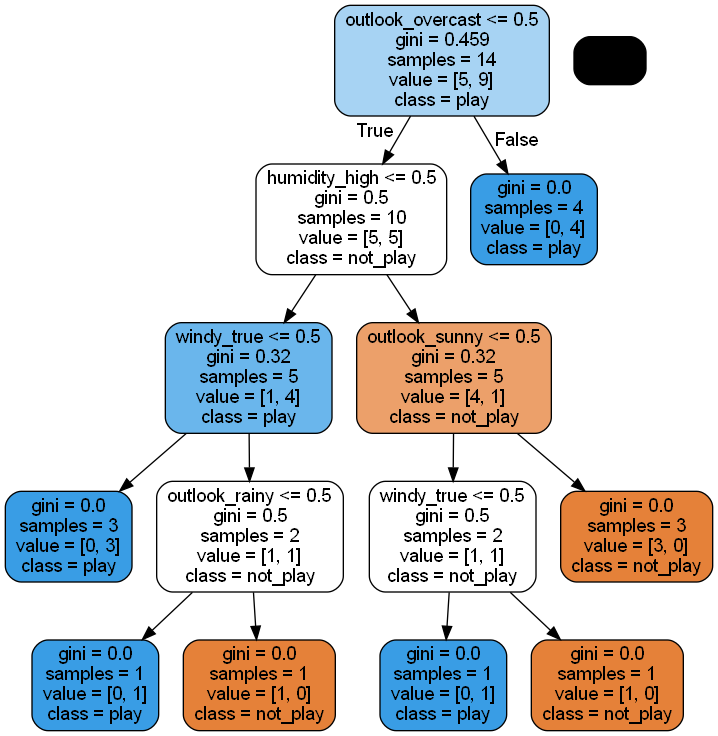

In [9]:
#tree image
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())